In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


In [10]:
import visualize

import matplotlib.pylab as plt
import datetime
import numpy as np
from obspy.clients.fdsn import Client

In [16]:
def get_events(loc, area_size = 1, min_magnitude = 1):
    """
    get erthquake events around a specific location
    """
    
    # init client
    client = Client("IRIS")
    
    # load data
    events = client.get_events(minmagnitude = min_magnitude, 
                               minlongitude = loc[1] - area_size, 
                               maxlongitude = loc[1] + area_size,
                               minlatitude  = loc[0] - area_size,
                               maxlatitude  = loc[0] + area_size)
    
    return events

In [17]:
def get_event_mag(event):
    """
    get the earthquake magnitude of an event
    """
    return event.magnitudes[0].mag
    
def get_event_date(event):
    """
    get the earthquake date of an event
    """
    t = event.origins[0].time
    year = t.year
    month = t.month
    day = t.day
    return (year, month, day)

In [18]:
def get_event_timeline_dict(events):
    event_dict = {}
    for event in events:
        event_dict[get_event_date(event)] = get_event_mag(event)
    return event_dict

In [19]:
def get_event_timeline_numpy(events):
    event_list = []
    for event in events:
        event_list.append([get_event_date(event), get_event_mag(event)])
    return np.array(event_list)

# get earthquake events around a specific vulcano

In [20]:
loc = (-1.470457, -78.448947)   # location of Cotopaxi
area_size = 1
min_magnitude = 1

events = get_events(loc, area_size = area_size, min_magnitude = min_magnitude)

In [21]:
print "{} events where found".format(len(events))

2228 events where found


# get_event_timeline

In [22]:
timeline = get_event_timeline_numpy(events)

In [23]:
timeline

array([[(2017, 4, 25), 4.2],
       [(2017, 3, 30), 4.3],
       [(2016, 11, 19), 4.2],
       ..., 
       [(1964, 1, 23), 3.7],
       [(1964, 1, 3), 4.5],
       [(1963, 5, 10), 6.8]], dtype=object)

In [13]:
np.save("data/events/tungurahua.npy", timeline)

In [3]:
timeline = np.load("data/events/tungurahua.npy")

In [5]:
print timeline.shape

(2228, 2)

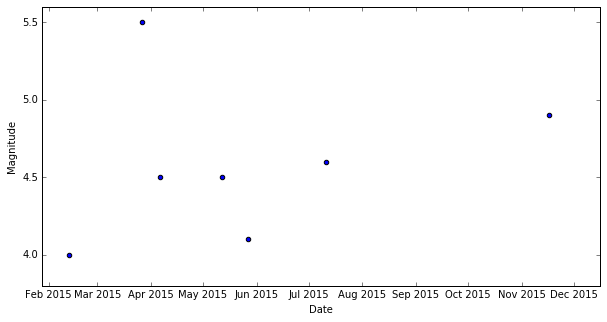

In [19]:
timeline = np.load("data/events/tungurahua.npy")

print timeline.shape

start_date = datetime.date(2015,1,1)
end_date   = datetime.date(2016,1,1)

plt.figure()

for event in timeline:
    
    date = event[0]
    date = datetime.date(*date)
    mag  = event[1]
    
    if start_date < date < end_date:
        plt.scatter([date], [mag])
        
    plt.ylabel("Magnitude")
    plt.xlabel("Date")
        
plt.show()